In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import os
from simulation import simulator_utils as s_utils
reload(s_utils)
%matplotlib inline
#files = [f for f in os.listdir('simulation/summaries/compressed/') if 'swap_step' in f]
#files = [f for f in os.listdir('simulation/summaries/') if 'compressed' not in f]
files = [f for f in os.listdir('simulation/summaries/compressed/') if 'cnn' in f and 'swap_step' in f]
mese = s_utils.MultiExperimentSummaryExtractor(files)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations


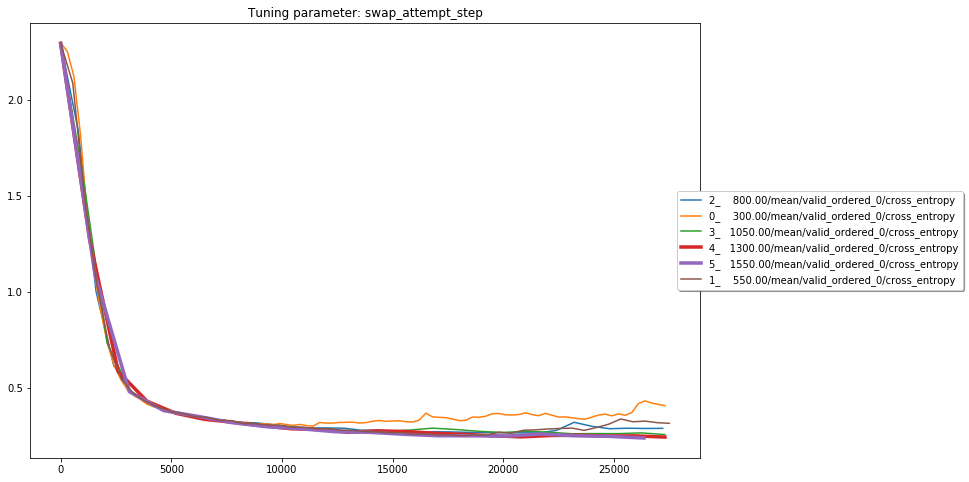

In [2]:
fig = mese.plot(['cross', 'valid', 'ordered_0'], param_min=2.56, mark_lines=[1300, 1550])


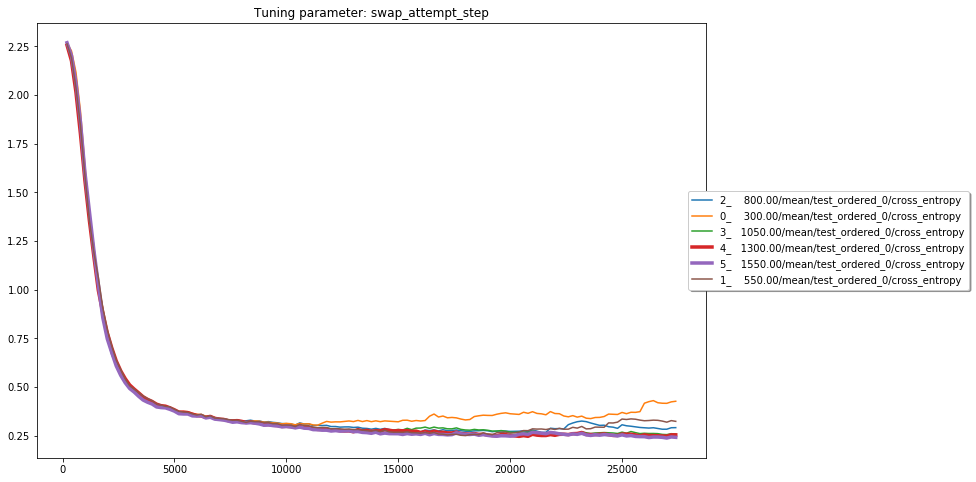

In [3]:
fig = mese.plot(['ordered_0', 'cross', 'test'], mark_lines=[1300, 1550])

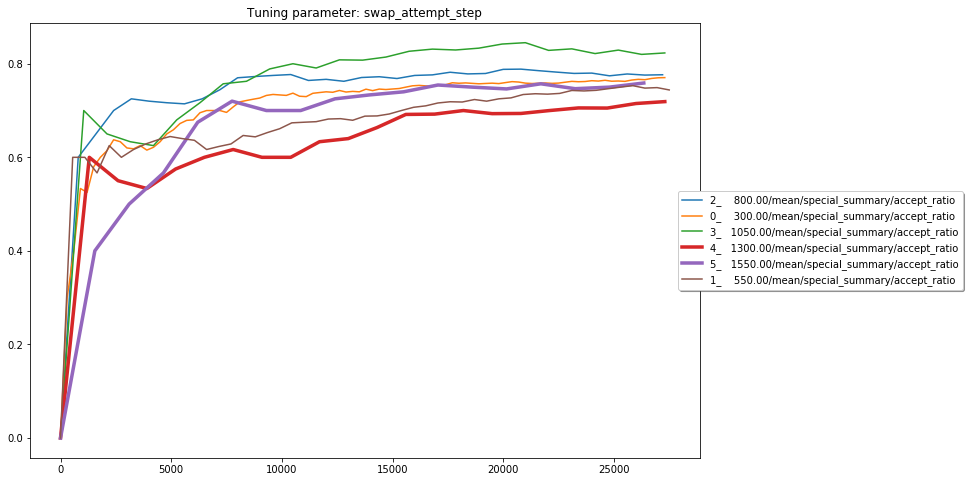

In [4]:
fig = mese.plot(['accept_ratio'],match='exact', mark_lines=[1550, 1300])

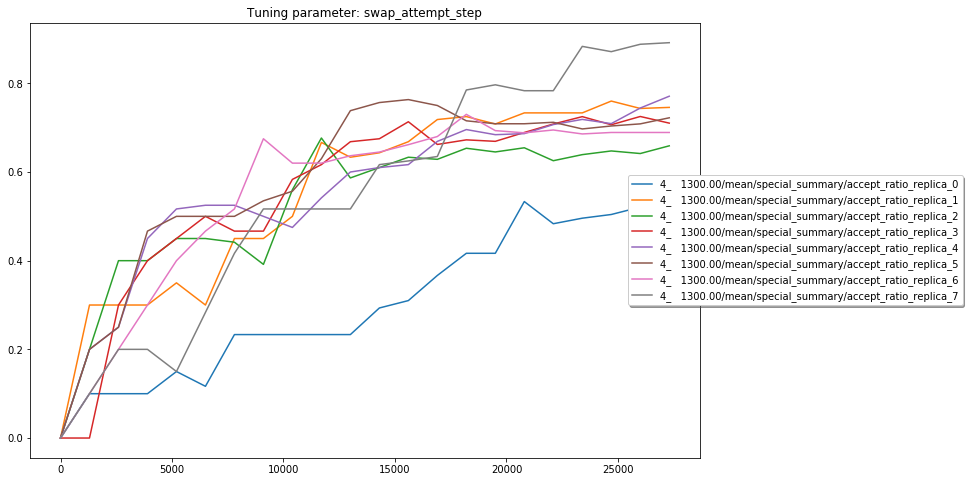

In [5]:
fig = mese.plot(['accept_ratio_replica'], param_min=1300, param_max=1300, mark_lines=[4])


In [6]:
files = [f for f in os.listdir('simulation/summaries/compressed/') if 'cnn' in f and 'temp_factor' in f and 'dynamic' in f]
mese = s_utils.MultiExperimentSummaryExtractor(files)

10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations


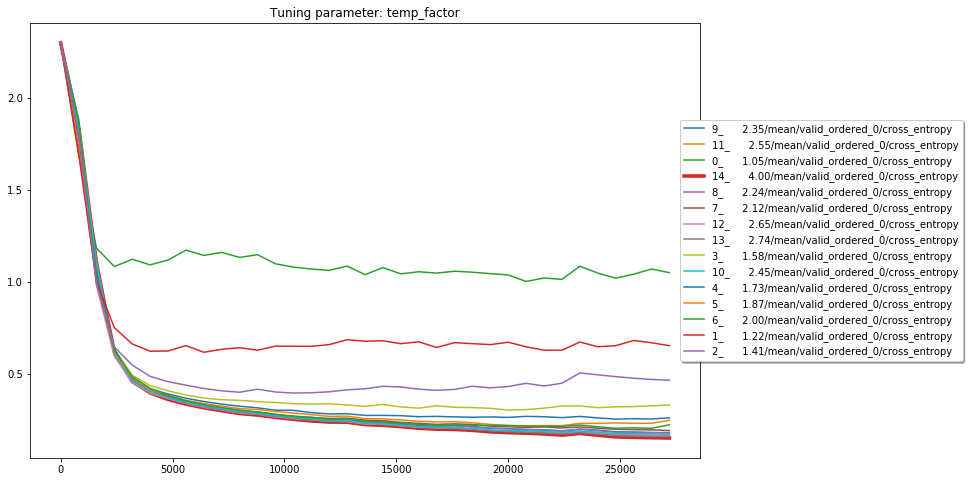

In [7]:
fig = mese.plot(['cross', 'valid', 'ordered_0'], param_min=None, mark_lines=[4])


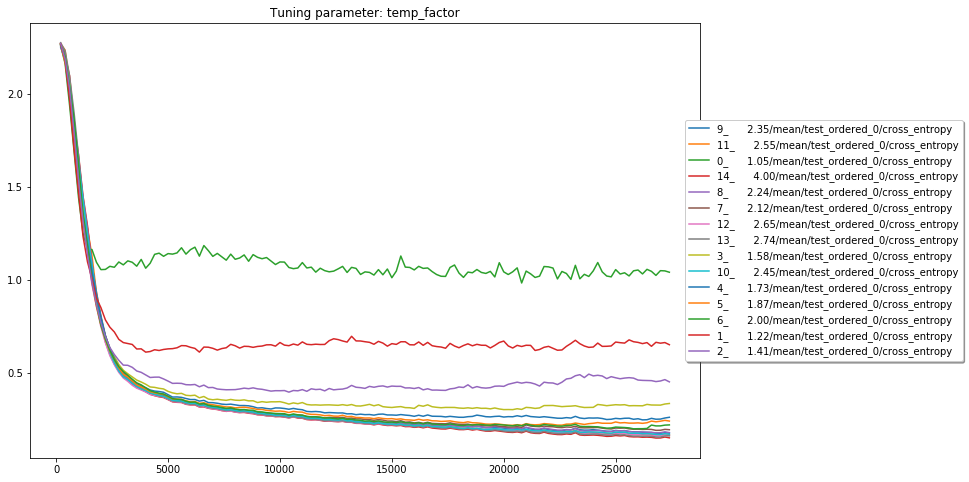

In [8]:
fig = mese.plot(['ordered_0', 'cross', 'test'], mark_lines=[1300, 1550])

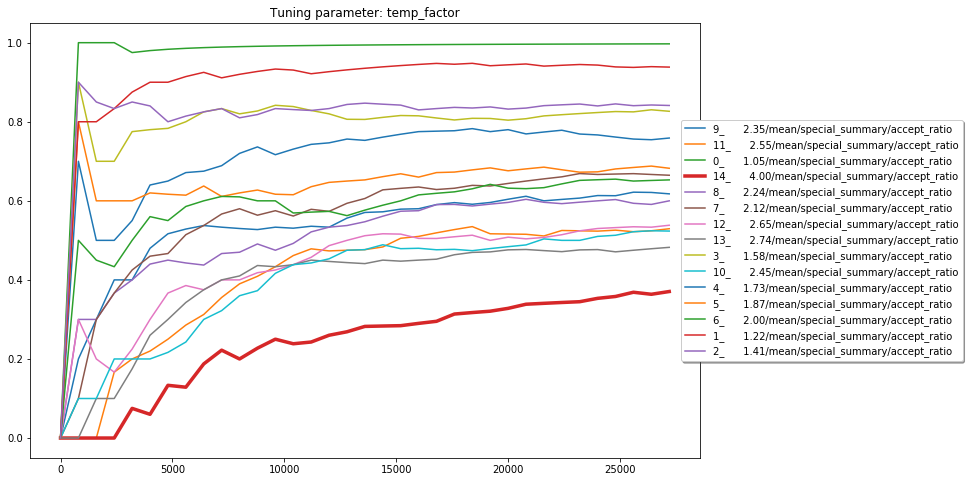

In [9]:
fig = mese.plot(['accept_ratio'],match='exact', mark_lines=[4])

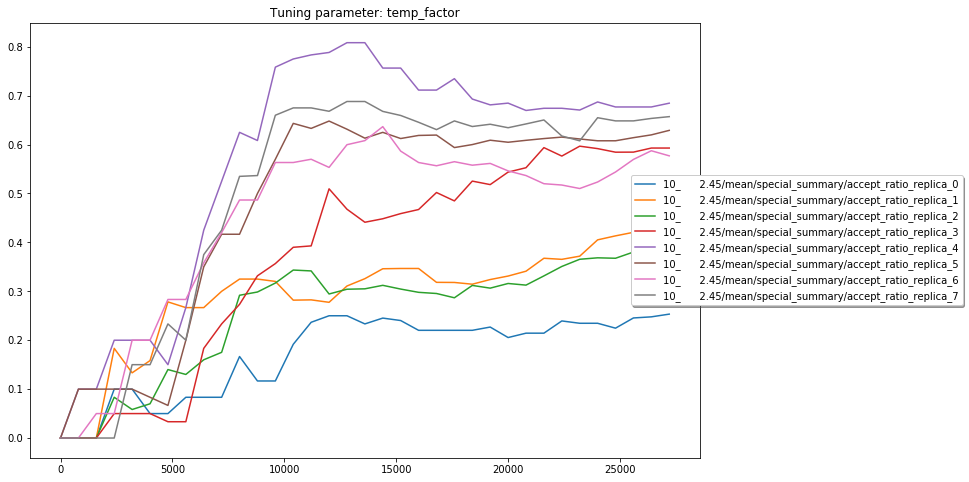

In [10]:
v = 2.45
fig = mese.plot(['accept_ratio_replica'], param_min=v, param_max=v, mark_lines=[4])


In [11]:
reload(s_utils)
se = s_utils.SummaryExtractor('cnn_mnist_temp_factor_PTLD_dynamic_14')

10 simulations


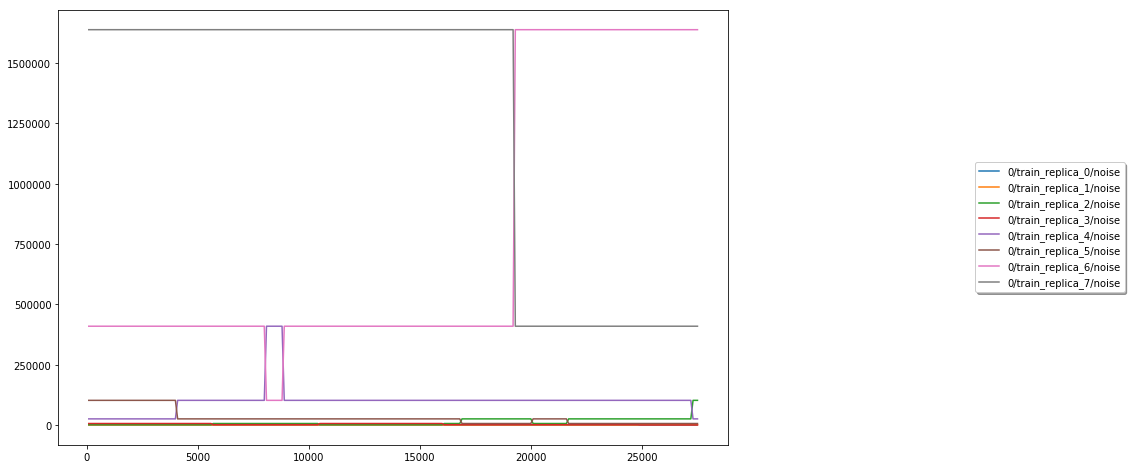

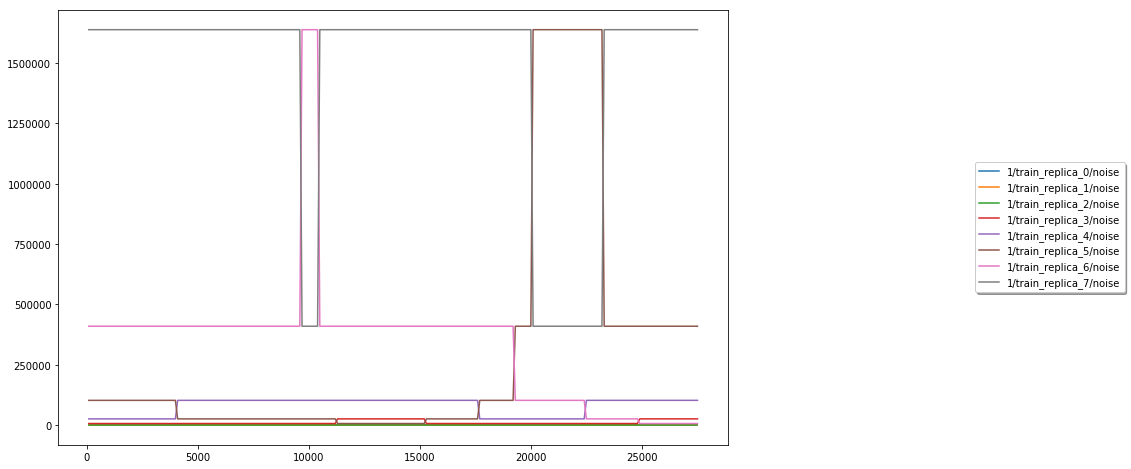

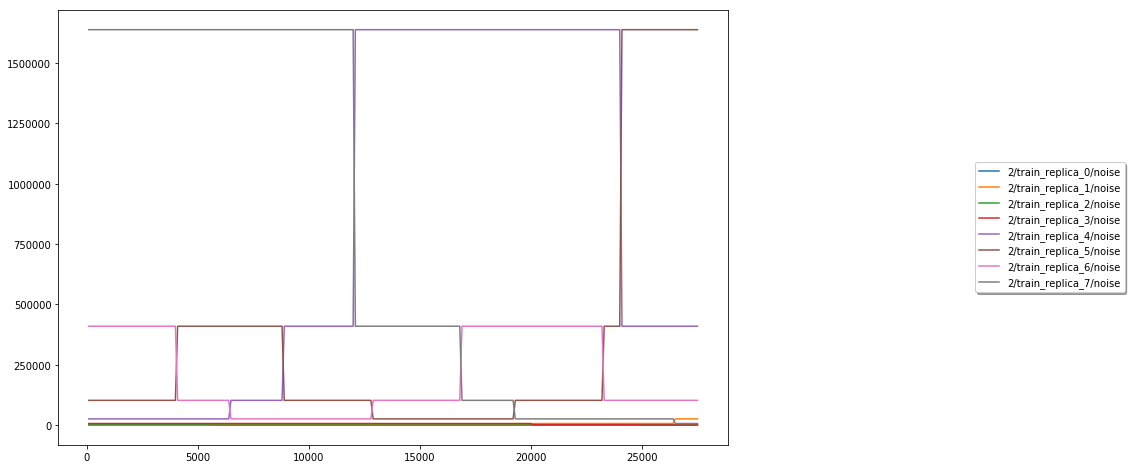

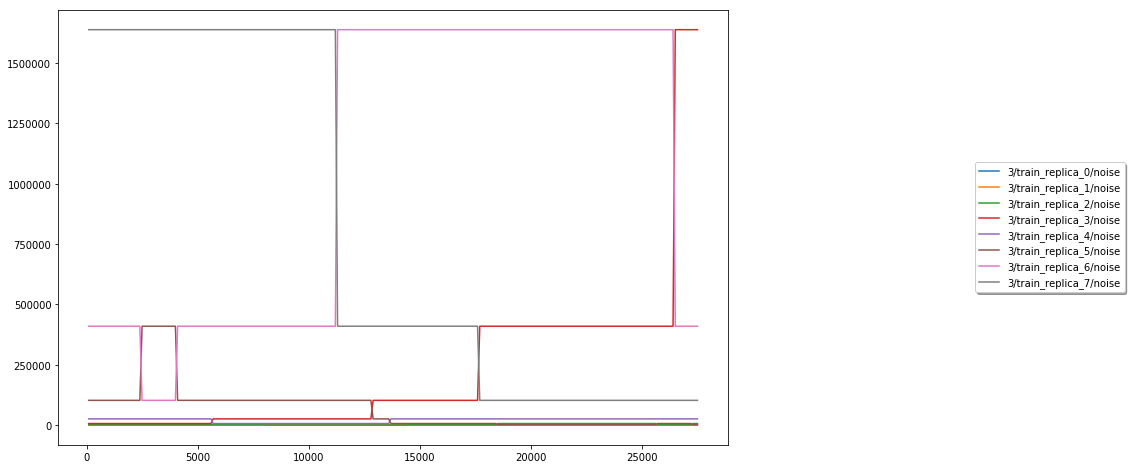

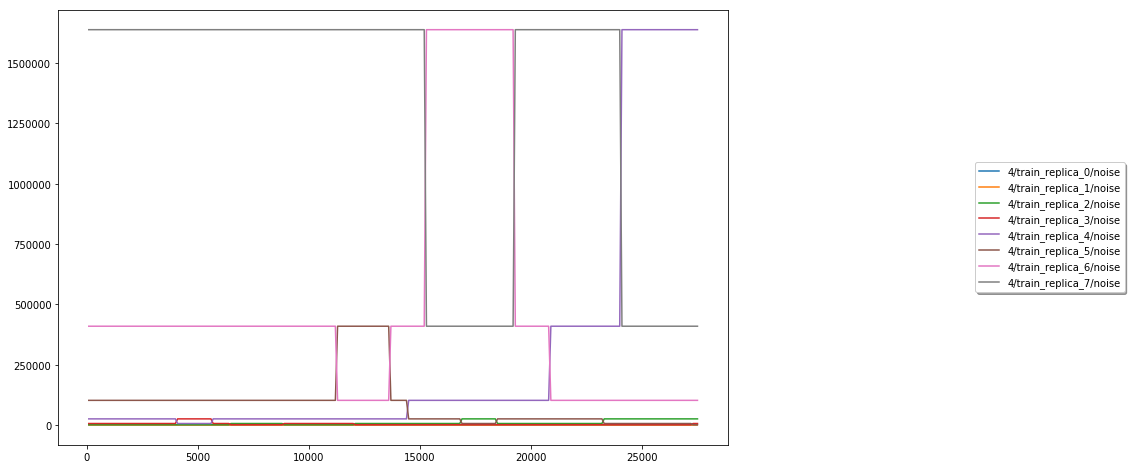

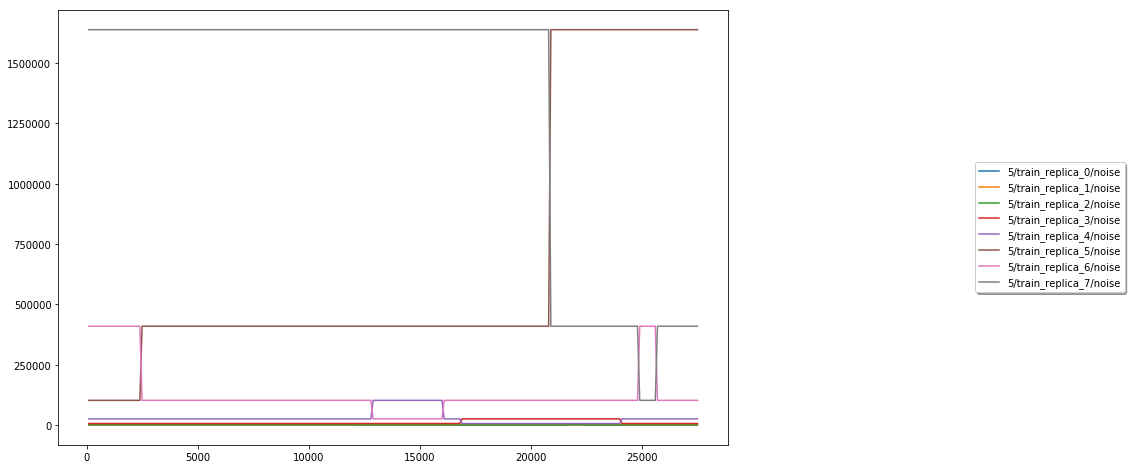

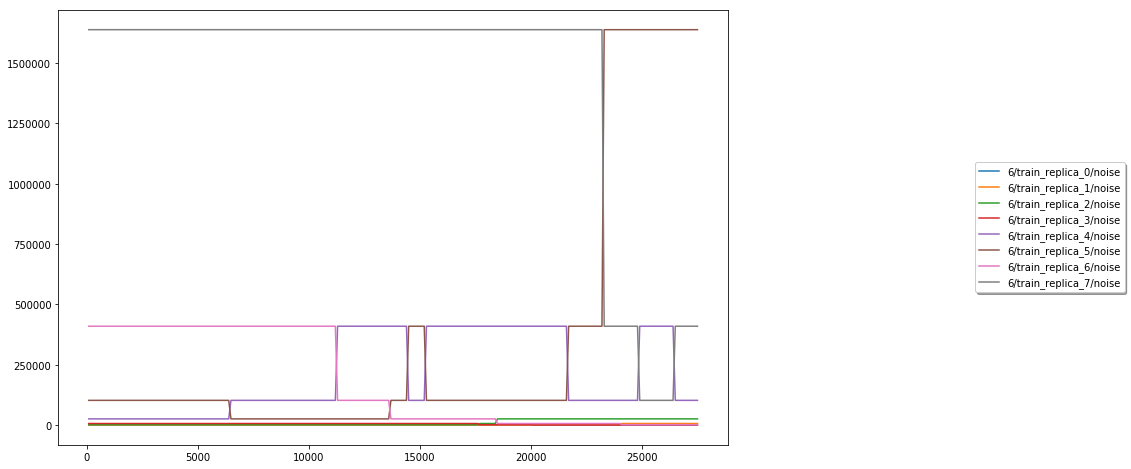

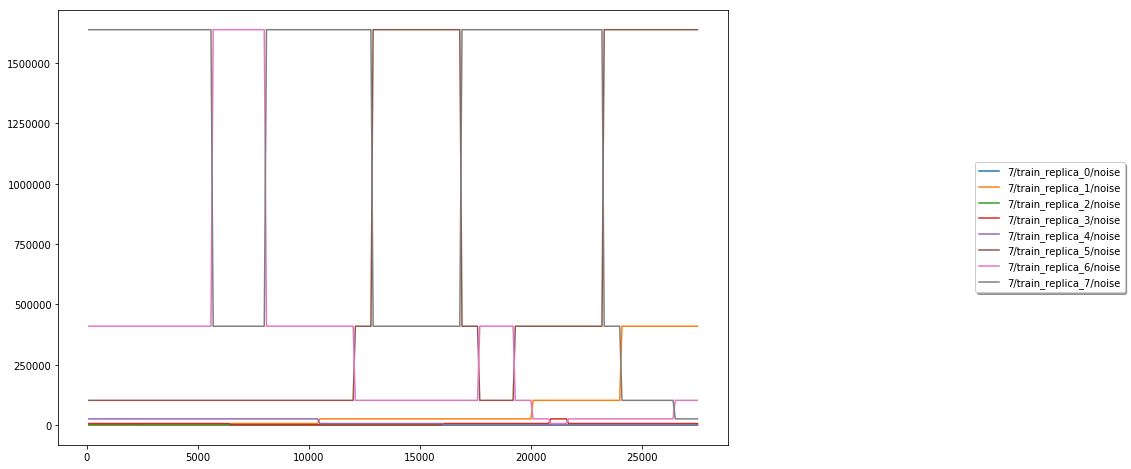

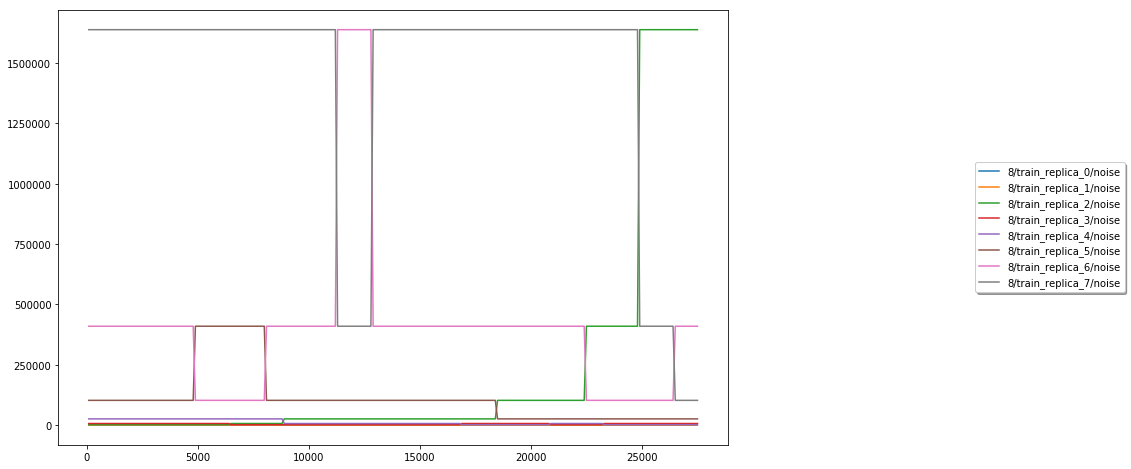

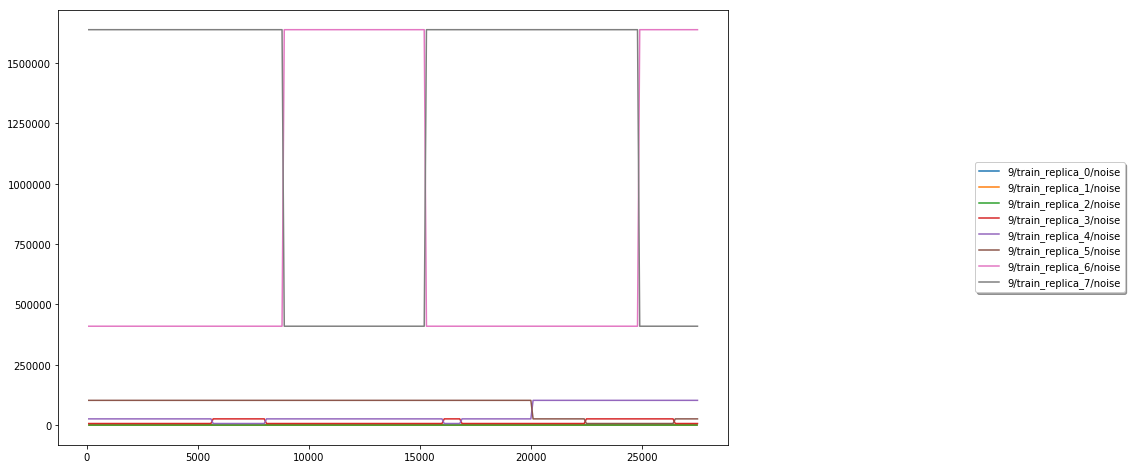

In [12]:

figs = [se.plot(['noise', 'replica', str(i)+'/t']) for i in range(10)]  


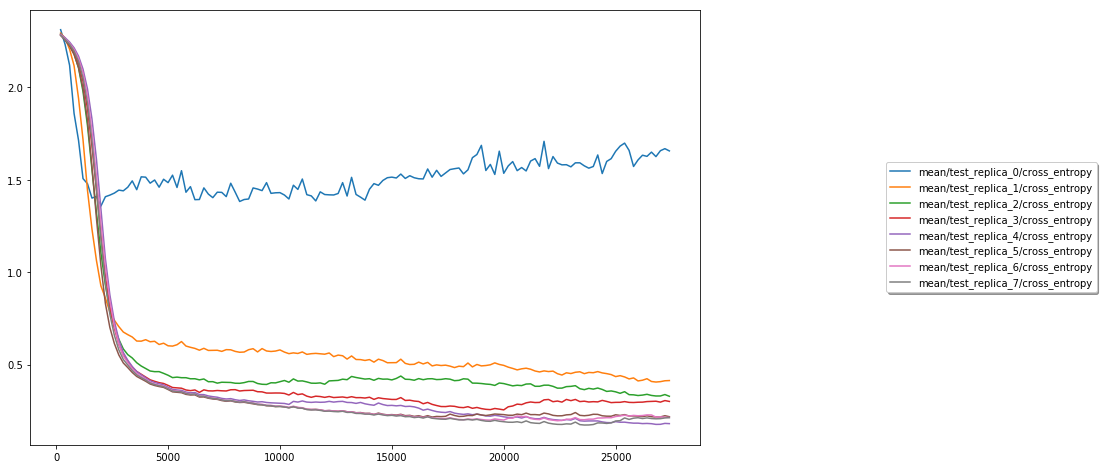

In [13]:
fig = se.plot(['test_replica_', 'cross', 'mean'])

In [52]:
import pandas as pd
import numpy as np
s = mese.summary_extractors['cnn_mnist_temp_factor_PTLD_dynamic_12']

In [15]:
keys = [k for k in s.all_summs_dict.keys() if 'accept_ratio_replica' in k]

In [83]:
v0 = s.get_summary('0/special_summary/accept_ratio_replica_0')
v1 = s.get_summary('0/special_summary/accept_ratio_replica_1')
v2 = s.get_summary('0/special_summary/accept_ratio_replica_2')

In [85]:
v_cols = [v[0] for v in v0[0]]
v_vals = [v[0] for v in v0[1]]
df = pd.DataFrame(columns=v_cols)
df.loc['0:0'] = v_vals
df.loc['0:1'] = [v[0] for v in v1[1]]
df.loc['0:2'] = [v[0] for v in v2[1]]
#df = pd.concat([df, pd.Series(list(v0[1]))], axis=0)
df

,0.0,800.0,1600.0,2400.0,3200.0,4000.0,4800.0,5600.0,6400.0,7200.0,...,20000.0,20800.0,21600.0,22400.0,23200.0,24000.0,24800.0,25600.0,26400.0,27200.0
0:0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
0:2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,...,0.500000,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571


In [79]:
v_cols = [v[0] for v in v0[0]]
v_vals = [v[0] for v in v0[1]]
v_vals

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [48]:
v_cols

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])